In [1]:
import sys
sys.path.append('../src/')
sys.path.append('../gtm/')

import importlib
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

from sim_utils import *
from simulation import *
from datetime import datetime

/Users/shim-kojio/Desktop/internship/codes/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### dirichlet X sage

In [2]:
num_topics = 20
num_simulations = 5
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 5000,
    "voc_size": 1000,
    "num_content_covs": 2,
    "num_prev_covs": 2,
    }
model_type = "gtm"
gtm_model_args = {
    "n_topics": num_topics,
    "num_epochs": 10,
    "update_prior": True,
    "doc_topic_prior": "dirichlet",
    "decoder_type": "sage",
    "decoder_estimate_interactions": False
    }
matching_by = "dot_product"

score_dict = {"cossim":[], "correlation":[],"keywords":[],"euclid":[]}
for i in range(num_simulations):
    s = Simulator(model_type=model_type,num_topics=num_topics)
    s.generate_docs(
        is_output=True,
        seed=i,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"],
        doc_args=doc_args
        )
    s.estimate_distributions(
        is_output=True,
        model_args=gtm_model_args
        )
    corres_num_topic_dict = matching_topic(
        model_type=model_type,
        matching_by=matching_by,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"]
        )
    for score_type in score_dict.keys():
        score = calculate_score(
            model_type=model_type,
            score_type=score_type,
            corres_num_topic_dict=corres_num_topic_dict,
            doc_topic_prior=gtm_model_args["doc_topic_prior"],
            decoder_type=gtm_model_args["decoder_type"],
            )
        score_dict[score_type].append(score)

    print("date:{}".format(datetime.now()))
    print("finished {}th work".format(i+1))
    print("  ")

with open("../data/{}/score_dict_{}_{}_{}.pickle".format(model_type,num_simulations,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]),"wb") as f:
    pickle.dump(score_dict,f)

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [01:47<00:00, 46.38it/s]


Epoch   1	Iter   10	Loss:2.7878518	Rec Loss:1.9790258	MMD:0.8088005	Sparsity_Loss:0.0000256	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:4.7567938	Rec Loss:3.6887452	MMD:1.0680009	Sparsity_Loss:0.0000477	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:2.0074840	Rec Loss:1.9713848	MMD:0.0352911	Sparsity_Loss:0.0008080	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.9267874	Rec Loss:3.9046308	MMD:0.0206933	Sparsity_Loss:0.0014635	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:1.9452783	Rec Loss:1.9238065	MMD:0.0207240	Sparsity_Loss:0.0007476	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.7250514	Rec Loss:3.6703509	MMD:0.0533622	Sparsity_Loss:0.0013383	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9725583	Rec Loss:1.9434378	MMD:0.0284067	Sparsity_Loss:0.0007137	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.7173888	Rec Loss:3.6850940	MMD:0.0310207	Sparsity_Loss:0.0012742	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9339540	Rec Loss:1.9257059	MMD:0.0075679	Sparsity_Loss:0.0006803	Pred_Loss:0.

100%|██████████| 5000/5000 [02:17<00:00, 36.30it/s]


Epoch   1	Iter   10	Loss:2.6802309	Rec Loss:1.9566748	MMD:0.7235307	Sparsity_Loss:0.0000256	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:4.4745124	Rec Loss:3.7060729	MMD:0.7683922	Sparsity_Loss:0.0000477	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:2.0053165	Rec Loss:1.9674001	MMD:0.0371061	Sparsity_Loss:0.0008103	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.7621047	Rec Loss:3.7143526	MMD:0.0462882	Sparsity_Loss:0.0014640	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:2.0445805	Rec Loss:1.9911032	MMD:0.0527283	Sparsity_Loss:0.0007491	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.7816916	Rec Loss:3.7312346	MMD:0.0491223	Sparsity_Loss:0.0013345	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:2.0167549	Rec Loss:1.9796784	MMD:0.0363629	Sparsity_Loss:0.0007137	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.9338904	Rec Loss:3.8453131	MMD:0.0873100	Sparsity_Loss:0.0012672	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9935501	Rec Loss:1.9784468	MMD:0.0144237	Sparsity_Loss:0.0006795	Pred_Loss:0.

100%|██████████| 5000/5000 [02:23<00:00, 34.81it/s]


Epoch   1	Iter   10	Loss:2.6211131	Rec Loss:1.9822083	MMD:0.6388792	Sparsity_Loss:0.0000256	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:5.0383884	Rec Loss:3.8174968	MMD:1.2208441	Sparsity_Loss:0.0000477	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:1.9941909	Rec Loss:1.9736315	MMD:0.0197494	Sparsity_Loss:0.0008101	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.8397199	Rec Loss:3.8230690	MMD:0.0151790	Sparsity_Loss:0.0014721	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:2.0705152	Rec Loss:1.9919673	MMD:0.0777982	Sparsity_Loss:0.0007495	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.8265385	Rec Loss:3.7871848	MMD:0.0380129	Sparsity_Loss:0.0013408	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:2.0203969	Rec Loss:1.9803419	MMD:0.0393408	Sparsity_Loss:0.0007143	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.7249767	Rec Loss:3.6847193	MMD:0.0389843	Sparsity_Loss:0.0012733	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9543592	Rec Loss:1.9428672	MMD:0.0108102	Sparsity_Loss:0.0006819	Pred_Loss:0.

100%|██████████| 5000/5000 [02:16<00:00, 36.65it/s]


Epoch   1	Iter   10	Loss:2.7148800	Rec Loss:1.9455526	MMD:0.7693020	Sparsity_Loss:0.0000256	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:4.8496376	Rec Loss:3.8195558	MMD:1.0300343	Sparsity_Loss:0.0000477	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:2.0463314	Rec Loss:1.9973403	MMD:0.0481796	Sparsity_Loss:0.0008115	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.8621745	Rec Loss:3.8221633	MMD:0.0385417	Sparsity_Loss:0.0014698	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:1.9894767	Rec Loss:1.9667413	MMD:0.0219844	Sparsity_Loss:0.0007510	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.7775928	Rec Loss:3.7834567	MMD:-0.0072064	Sparsity_Loss:0.0013424	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:2.0219939	Rec Loss:1.9511313	MMD:0.0701473	Sparsity_Loss:0.0007152	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.7416550	Rec Loss:3.6342432	MMD:0.1061367	Sparsity_Loss:0.0012749	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:2.0455134	Rec Loss:2.0096257	MMD:0.0352057	Sparsity_Loss:0.0006820	Pred_Loss:0

100%|██████████| 5000/5000 [02:44<00:00, 30.37it/s]


Epoch   1	Iter   10	Loss:2.7945690	Rec Loss:1.9659699	MMD:0.8285736	Sparsity_Loss:0.0000256	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:4.6695296	Rec Loss:3.7363779	MMD:0.9331042	Sparsity_Loss:0.0000477	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:1.9458950	Rec Loss:1.9012988	MMD:0.0437871	Sparsity_Loss:0.0008092	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.8814141	Rec Loss:3.7834221	MMD:0.0965278	Sparsity_Loss:0.0014639	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:2.0227132	Rec Loss:1.9918027	MMD:0.0301609	Sparsity_Loss:0.0007496	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.7469637	Rec Loss:3.7395239	MMD:0.0060944	Sparsity_Loss:0.0013454	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:2.0356400	Rec Loss:1.9843328	MMD:0.0505943	Sparsity_Loss:0.0007130	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.6729308	Rec Loss:3.6545338	MMD:0.0171271	Sparsity_Loss:0.0012699	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9702662	Rec Loss:1.9502802	MMD:0.0193076	Sparsity_Loss:0.0006784	Pred_Loss:0.

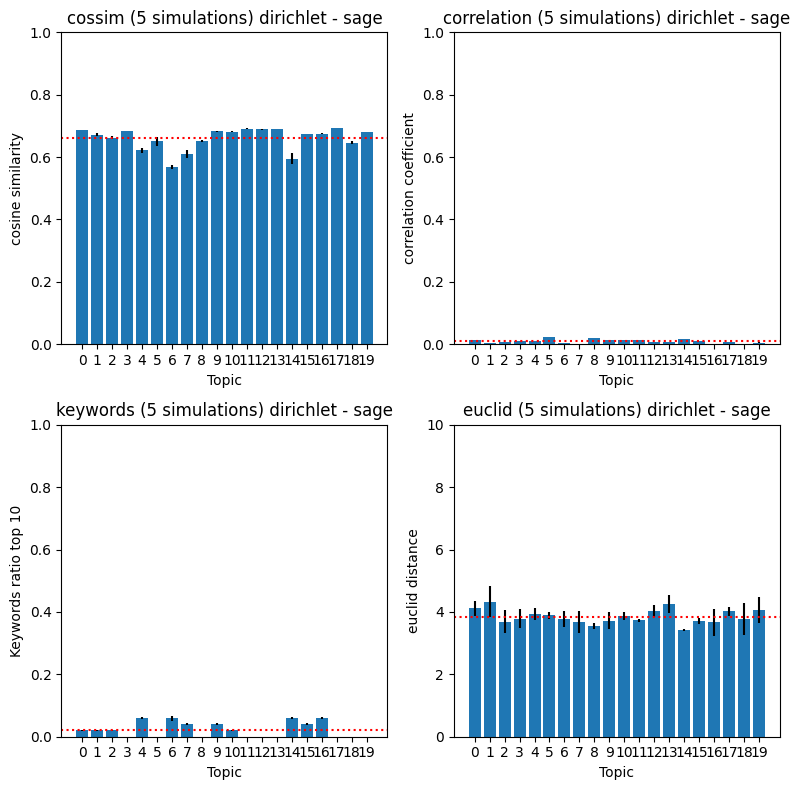

In [5]:
fig = plt.figure(figsize=(8,8),facecolor="white", tight_layout=True)
ax1 = fig.add_subplot(2, 2, 1,xlabel="Topic", ylabel="cosine similarity")
ax2 = fig.add_subplot(2, 2, 2, xlabel="Topic", ylabel="correlation coefficient")
ax3 = fig.add_subplot(2, 2, 3, xlabel="Topic", ylabel="Keywords ratio top 10")
ax4 = fig.add_subplot(2, 2, 4, xlabel="Topic", ylabel="euclid distance")
score_type_list = ["cossim","correlation","keywords", "euclid"]
ax_list = [ax1,ax2,ax3,ax4]
for i,score_type in enumerate(score_type_list):
    df_score_res = pd.DataFrame(score_dict[score_type],columns=["Topic{}".format(i) for i in range(num_topics)])
    x = np.arange(num_topics)
    mean = df_score_res.mean()
    var = df_score_res.var()
    ax_list[i].bar(x, mean, yerr=var)
    ax_list[i].axhline(mean.mean(), color='r', linestyle='dotted')
    if i ==3:
        ax_list[i].set_ylim(0, 10)
    else:
        ax_list[i].set_ylim(0, 1)
    ax_list[i].set_xticks(range(num_topics))
    ax_list[i].set_title("{} ({} simulations) {} - {}".format(score_type_list[i],num_simulations,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
    # plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()